In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn  as sns

%matplotlib inline
import math

In [26]:
data = pd.read_excel(r'C:\Users\mansi\Documents\LetsUpgrade\Day 21\Logistic Regression\Bank_Personal_Loan_Modelling\Bank_loan.xlsx',sheet_name=1)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


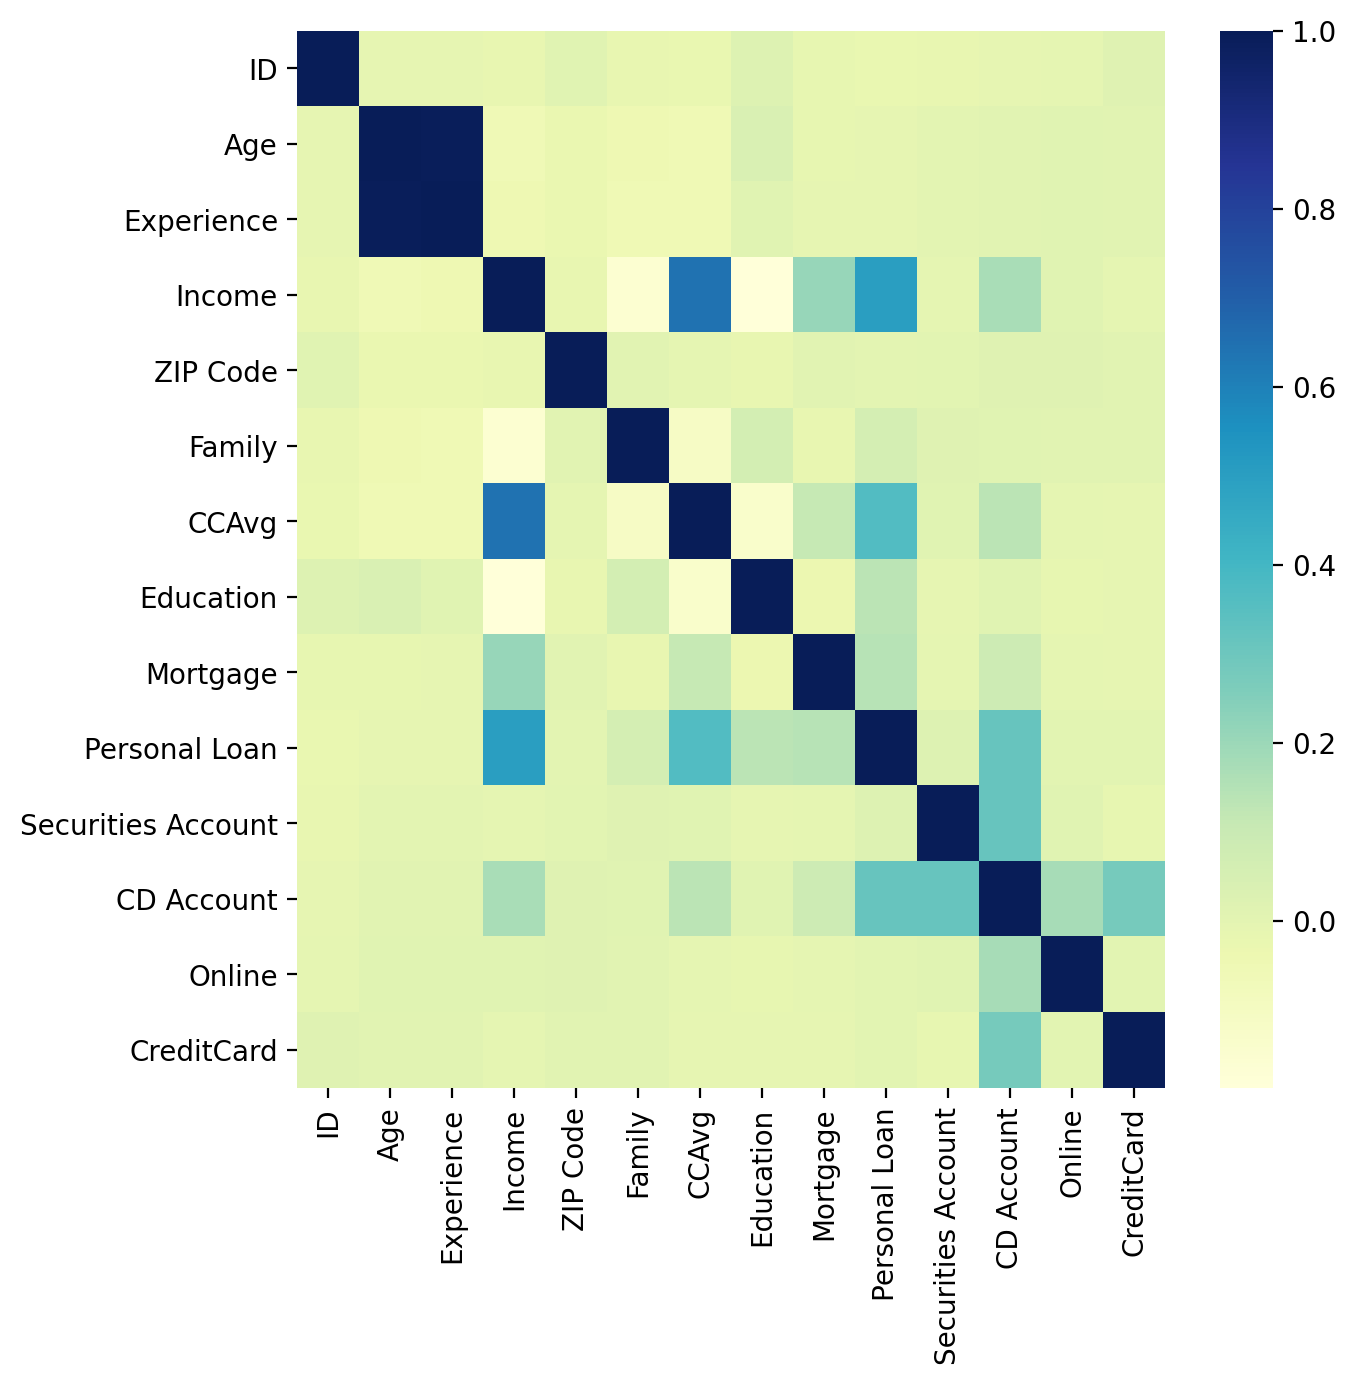

In [29]:
plt.figure(figsize= (7,7), dpi=200)
sns.heatmap(data.corr(), cmap="YlGnBu")

##### Personal Loan has moderate correlation with 'Income', 'CCAvg' & 'CD Account'. Further as we have to take care of the no multicollinearity, we have a very stron correltion between Income and CC Avg.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D90B1ACF10>,
      dtype=object)

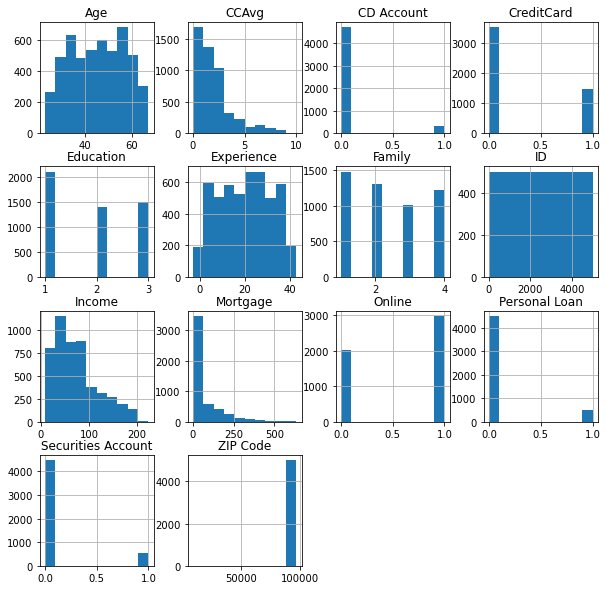

In [30]:
data.hist(figsize= (10,10))

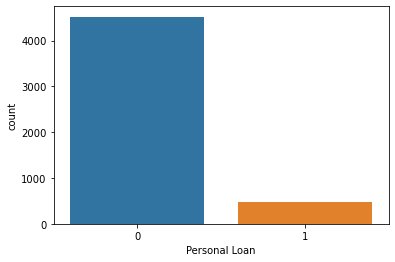

In [31]:
sns.countplot(x = 'Personal Loan', data=data)

In [32]:
data.isnull().sum().sum()

0

In [33]:
data.drop(['ID', 'ZIP Code'], axis=1, inplace= True)

In [34]:
#Data splitting
target = data['Personal Loan']
x = data.drop('Personal Loan',axis=1)
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [35]:
rate= (100*target.value_counts()[1])/target.count()
print(f"Lending success is {rate} %")

Lending success is 9.6 %


In [36]:
import statsmodels.api as sm #CHECKING IMPORTANT VARIABLES

x1 = sm.add_constant(x)
Logistic = sm.Logit(target,x1)
result = Logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128435
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4988
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.5938
Time:                        12:38:16   Log-Likelihood:                -642.18
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.1928      1.645     -7.411      0.000     -15.417      -8.968
Age                   -0.0536      0.061     -0.874      0.382      -0.174       0.067
Experience             0.0638      0.061      1.046      0.295      -0.056       0.183
Income                 0.0546      0.003     20.831      0.000       0.049       0.060
Family                 0.6958      0.074      9.364      0.000       0.550       0.841
CCAvg                  0.1240      0.040      3.127      0.002       0.046       0.202
Education              1.7362      0.115     15.088      0.000       1.511       1.962
Mortgage               0.0005      0.001      0.856      0.392      -0.001       0.002
Securities Account    -0.9368      0.286     -3.277      0.001      -1.497      -0.377
CD Account             3.8225      0.324     11.800      0.000       3.188       4.457
Online                -0.6752      0.157     -4.298      0.000      -0.983      -0.367
CreditCard            -1.1197      0.205     -5.462      0.000      -1.522      -0.718
======================================================================================
"""

#### p-value <= 0.05 is relevant. 
#### Dropping Age, Experience, Mortgage from out data-set to as these attributes are not important as p-values> 0.05. 


In [37]:
x2= x.drop(["Age", "Experience", "Mortgage"], axis=1)
x2.head()

,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
0,49,4,1.6,1,1,0,0,0
1,34,3,1.5,1,1,0,0,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,1


In [38]:
x3 = sm.add_constant(x2)
Logistic = sm.Logit(target,x3)
result = Logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.128862
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4991
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.5925
Time:                        12:38:16   Log-Likelihood:                -644.31
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.2242      0.562    -23.510      0.000     -14.327     -12.122
Income                 0.0547      0.003     21.133      0.000       0.050       0.060
Family                 0.6904      0.074      9.304      0.000       0.545       0.836
CCAvg                  0.1137      0.039      2.896      0.004       0.037       0.191
Education              1.7041      0.112     15.162      0.000       1.484       1.924
Securities Account    -0.9346      0.285     -3.281      0.001      -1.493      -0.376
CD Account             3.8533      0.323     11.913      0.000       3.219       4.487
Online                -0.6675      0.157     -4.259      0.000      -0.975      -0.360
CreditCard            -1.1237      0.205     -5.481      0.000      -1.525      -0.722
======================================================================================
"""

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, target_train, target_test = train_test_split(x2,target, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(x_train,target_train)

C:\Users\mansi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
target_pred = lg.predict(x_test)
target_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
from sklearn.metrics import classification_report
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       910
           1       0.88      0.63      0.74        90

    accuracy                           0.96      1000
   macro avg       0.92      0.81      0.86      1000
weighted avg       0.96      0.96      0.96      1000



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(target_test,target_pred) 

array([[902,   8],
       [ 33,  57]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score
print(f"Model accuracy is {round((accuracy_score(target_test,target_pred))*100, 1)} %")

Model accuracy is 95.9 %
